<a href="https://colab.research.google.com/github/riken-emar/MCR-ALS/blob/main/pyMCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install nmrglue

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 224 kB 5.3 MB/s 


In [1]:
pip install pyMCR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install nimfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.2 MB/s 


In [5]:
from scipy.fftpack import fft, ifft
import scipy.signal as sig
import matplotlib.pyplot as plt
import matplotlib.cm
import nmrglue as ng
import numpy as np
import pandas as pd
from numpy.random import randn
import csv
import cmath
import math
import tkinter
from matplotlib.backends.backend_tkagg  import FigureCanvasTkAgg, NavigationToolbar2Tk
from tkinter import messagebox
import nimfa
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_csv("/MIX1.txt", sep='\t')
df

,3.1664,3.16835,3.17029,3.17224,3.17419,3.17613,3.17808,3.18002,3.18197,3.18391,...,3.28121,3.28315,3.2851,3.28704,3.28899,3.29094,3.29288,3.29483,3.29677,3.29872
0,5.090415,5.260472,5.456454,6.129976,6.942296,6.881316,6.297407,6.124968,6.653713,6.920085,...,1.769218,1.121643,0.733640,0.542814,0.455569,0.721731,0.767994,0.504716,0.329636,0.000000
1,4.476456,4.953048,4.841054,4.485274,4.386918,4.247256,4.041224,3.873548,4.377473,5.161606,...,1.371319,1.531545,1.288992,0.802446,0.267312,0.000000,0.067451,0.082412,0.228070,0.585408
2,1.236961,1.462762,1.381018,1.567165,1.805469,2.577937,3.359899,3.781495,4.420261,5.139223,...,0.444809,0.354891,0.152666,0.094735,0.000000,0.290607,0.554262,0.782459,0.999301,0.843966
3,4.293334,4.801160,5.257647,5.696826,5.821155,5.552598,5.318716,5.454080,5.485157,5.432511,...,2.110041,2.192759,1.736453,1.111093,0.591668,0.451077,0.260112,0.000000,0.091975,0.275993
4,1.250193,1.313970,1.100515,1.091628,1.107621,1.129035,1.711848,2.704307,3.940694,5.051626,...,1.335701,1.263939,0.968785,0.612123,0.602039,0.602430,0.452924,0.132107,0.000000,0.214759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2.090863,2.220441,2.473045,2.706976,2.929552,3.304833,3.994667,4.787096,5.371663,5.682280,...,0.153243,0.000000,0.027697,0.405036,0.690823,0.566011,0.580986,0.973617,1.488348,1.433013
120,2.305920,2.671343,3.042704,3.492660,4.059087,4.202489,4.305121,4.413227,4.194433,4.145789,...,0.340220,0.356128,0.565596,0.351648,0.512764,0.742815,0.958919,0.665460,0.000000,0.009768
121,2.394440,2.352693,2.608748,2.926875,3.085767,3.092213,3.165207,3.255510,3.250418,3.311534,...,1.667882,2.003479,2.012421,2.007905,1.925265,1.489100,0.882552,0.595303,0.347269,0.000000
122,3.436019,3.659596,3.856616,4.139911,4.352348,4.463763,4.501491,4.793943,5.168050,5.628674,...,1.921261,1.645193,1.060492,0.539762,0.404457,0.299188,0.095510,0.000000,0.089920,0.405620


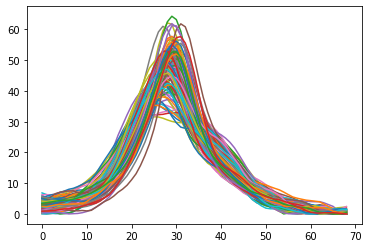

In [39]:
fig = plt.figure()
plt.plot(df.values.T)
plt.show()

In [40]:
from pymcr.mcr import McrAR
mcrar = McrAR()

In [47]:
mcrar.fit(df.values.T, ST=df.values.T*1)

Error increased above fractionalctol_increase (C iter). Exiting


INFO:pymcr.mcr:Error increased above fractionalctol_increase (C iter). Exiting


[3.737415665153441e-22, 2.812548449415717e-26]


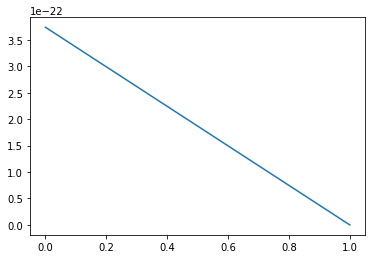

In [48]:
print(mcrar.err)
fig = plt.figure()
plt.plot(mcrar.err)
plt.show()

[[ 1.00000000e+00  1.50044738e-14 -0.00000000e+00 ...  6.48090902e-15
  -0.00000000e+00 -0.00000000e+00]
 [ 4.28493339e-14  1.00000000e+00  7.03048730e-14 ... -0.00000000e+00
   4.35762537e-15 -0.00000000e+00]
 [-0.00000000e+00  2.58820743e-14  1.00000000e+00 ...  2.76688394e-16
   2.31759056e-15 -0.00000000e+00]
 ...
 [ 1.52329641e-15 -0.00000000e+00  2.72438322e-15 ...  1.00000000e+00
  -0.00000000e+00  8.53483950e-16]
 [ 2.05948158e-15 -0.00000000e+00  2.85925797e-15 ...  2.77555756e-16
   1.00000000e+00  1.66533454e-16]
 [-0.00000000e+00 -0.00000000e+00  1.35828848e-15 ...  1.00613962e-15
  -0.00000000e+00  1.00000000e+00]]


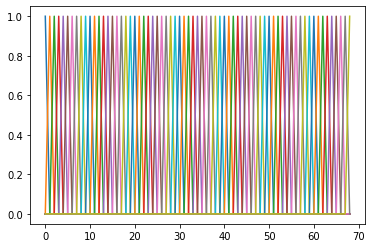

In [49]:
print(mcrar.C_)
fig = plt.figure()
plt.plot(mcrar.C_)
plt.show()

[[ 5.09041535  4.47645643  1.23696067 ...  2.39444005  3.43601932
   0.89324726]
 [ 5.2604716   4.95304845  1.46276183 ...  2.35269295  3.65959637
   0.93304937]
 [ 5.45645425  4.84105361  1.38101845 ...  2.60874846  3.85661592
   1.05384766]
 ...
 [ 0.50471611  0.08241249  0.78245947 ...  0.5953025  -0.
   0.27509264]
 [ 0.32963612  0.22807001  0.99930073 ...  0.34726889  0.08991974
   0.09583358]
 [-0.          0.58540824  0.84396617 ... -0.          0.40561982
  -0.        ]]


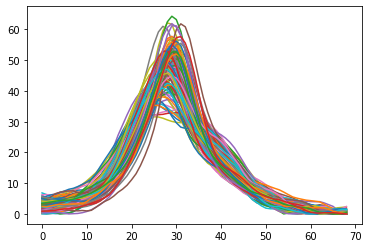

In [50]:
print(mcrar.ST_)
fig = plt.figure()
plt.plot(mcrar.ST_)
plt.show()

[[ 5.09041535  4.47645643  1.23696067 ...  2.39444005  3.43601932
   0.89324726]
 [ 5.2604716   4.95304845  1.46276183 ...  2.35269295  3.65959637
   0.93304937]
 [ 5.45645425  4.84105361  1.38101845 ...  2.60874846  3.85661592
   1.05384766]
 ...
 [ 0.50471611  0.08241249  0.78245947 ...  0.5953025  -0.
   0.27509264]
 [ 0.32963612  0.22807001  0.99930073 ...  0.34726889  0.08991974
   0.09583358]
 [-0.          0.58540824  0.84396617 ... -0.          0.40561982
  -0.        ]]


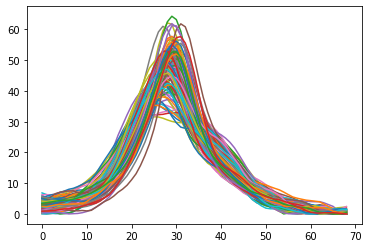

In [51]:
print(mcrar.components_)
fig = plt.figure()
plt.plot(mcrar.components_)
plt.show()

In [61]:
print("Total number of iterations performed", mcrar.n_iter)
print("Total number of features, e.g. spectral frequencies.",mcrar.n_features)
print("Total number of samples (e.g., pixels)",mcrar.n_samples)
print("print(mcrar.n_targets)", mcrar.n_targets)
print("Iteration when optimal C and ST calculated", mcrar.n_iter_opt)

Total number of iterations performed 2
Total number of features, e.g. spectral frequencies. 124
Total number of samples (e.g., pixels) 69
print(mcrar.n_targets) 69
Iteration when optimal C and ST calculated 1


In [69]:
df.values.T[0:i]

array([[5.09041536, 4.47645643, 1.23696067, 4.29333395, 1.25019252,
        4.19772827, 4.51953237, 1.68522894, 3.60963743, 2.7083253 ,
        2.52722293, 4.45773876, 3.10353518, 2.8935606 , 3.50557212,
        4.8694605 , 2.21499264, 3.12793545, 4.92907753, 4.42566587,
        0.77044889, 1.91972094, 2.29407365, 1.60381839, 0.42996561,
        2.45960985, 1.55291522, 0.6716498 , 1.76283818, 3.38844357,
        1.7051981 , 1.87646688, 0.66558928, 4.00087563, 4.12433765,
        2.31766187, 4.42095318, 0.08017279, 2.64013679, 3.72139225,
        0.20087922, 3.16605543, 2.60274392, 2.48188197, 1.70495264,
        0.70122331, 1.35370982, 2.04863237, 2.05807679, 6.82571856,
        3.00432061, 4.33162873, 3.2883172 , 1.372248  , 2.91055815,
        5.15100179, 2.15180762, 1.41671806, 2.61873559, 3.15962991,
        6.02432968, 3.01731044, 1.0232893 , 0.32407663, 1.9822723 ,
        2.51396948, 3.84278724, 1.32634188, 4.29169701, 0.05697156,
        4.91358808, 3.72395537, 5.53204262, 3.03

rank 3
Max iterations reached (50).


INFO:pymcr.mcr:Max iterations reached (50).


0


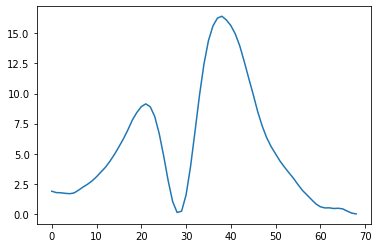

1


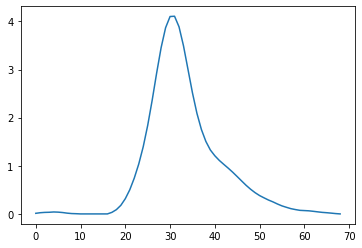

2


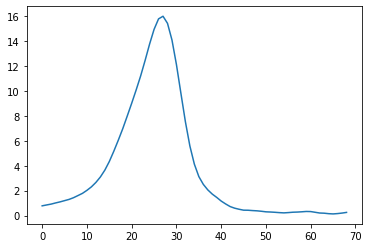

0


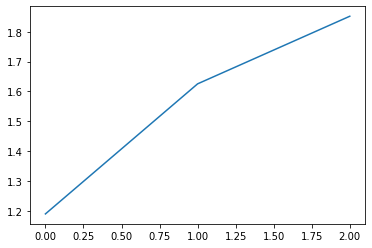

1


<Figure size 432x288 with 0 Axes>

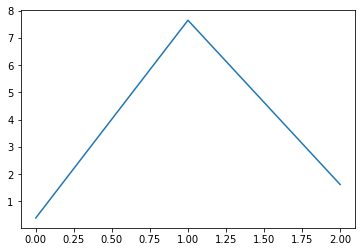

2


<Figure size 432x288 with 0 Axes>

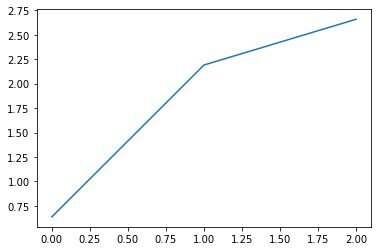

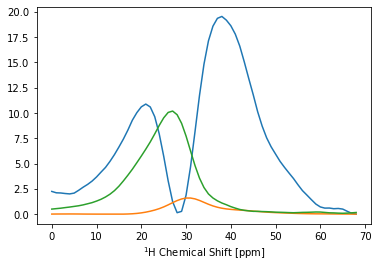

rank 4
Error increased above fractionalctol_increase (C iter). Exiting


INFO:pymcr.mcr:Error increased above fractionalctol_increase (C iter). Exiting


0


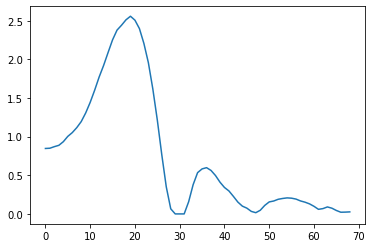

1


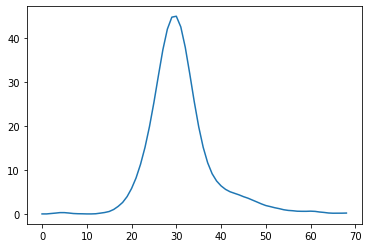

2


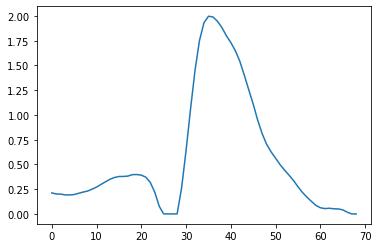

3


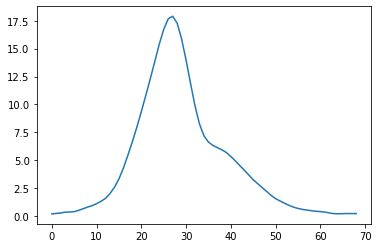

0


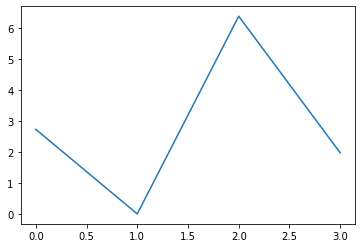

1


<Figure size 432x288 with 0 Axes>

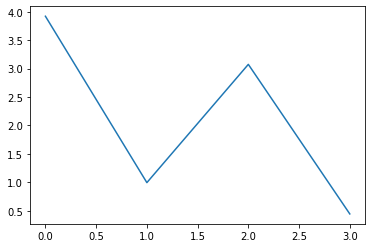

2


<Figure size 432x288 with 0 Axes>

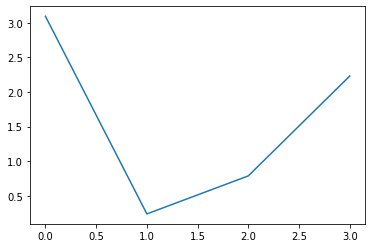

3


<Figure size 432x288 with 0 Axes>

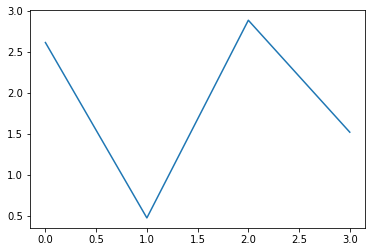

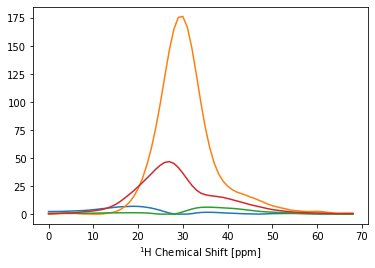

rank 5
Error increased above fractional tol_increase (ST iter). Exiting


INFO:pymcr.mcr:Error increased above fractional tol_increase (ST iter). Exiting


0


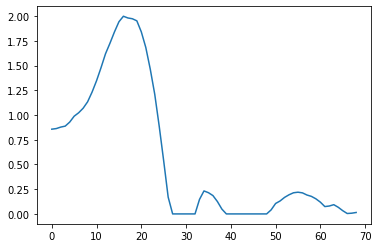

1


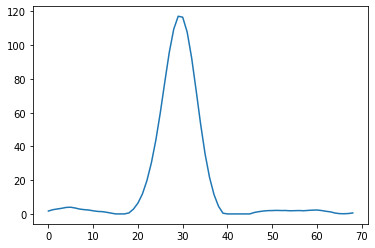

2


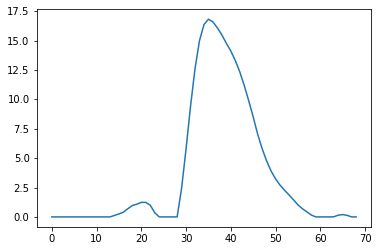

3


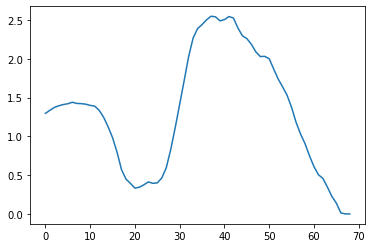

4


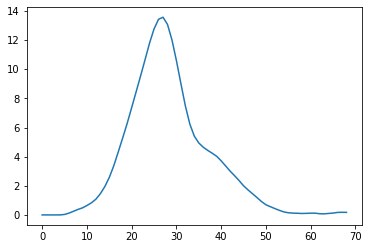

0


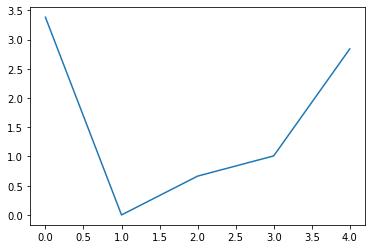

1


<Figure size 432x288 with 0 Axes>

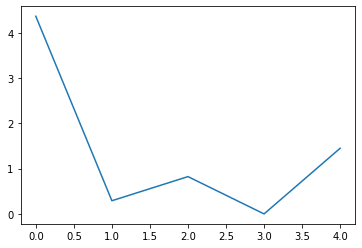

2


<Figure size 432x288 with 0 Axes>

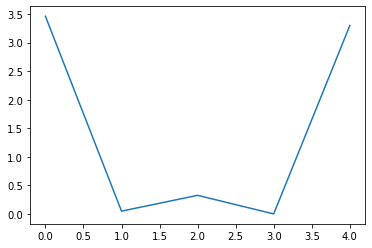

3


<Figure size 432x288 with 0 Axes>

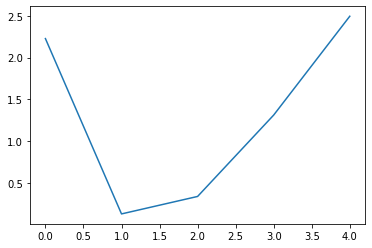

4


<Figure size 432x288 with 0 Axes>

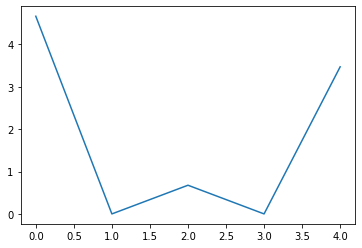

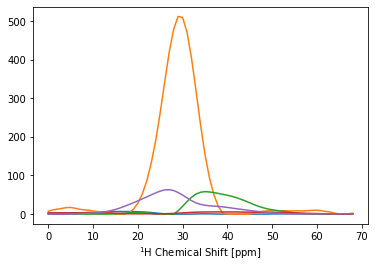

rank 6
Error increased above fractional tol_increase (ST iter). Exiting


INFO:pymcr.mcr:Error increased above fractional tol_increase (ST iter). Exiting


0


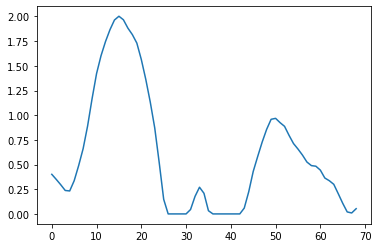

1


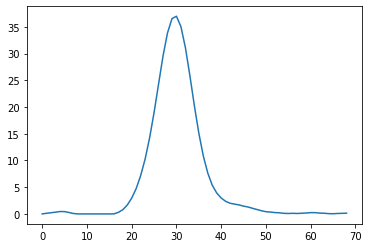

2


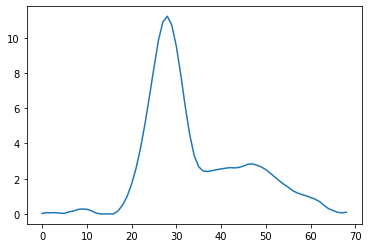

3


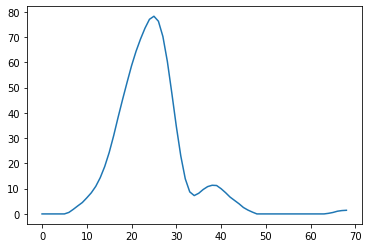

4


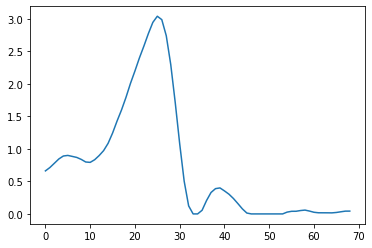

5


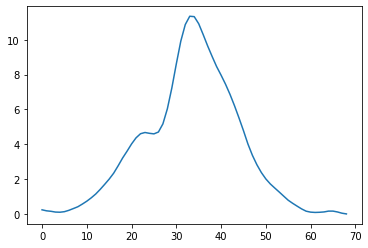

0


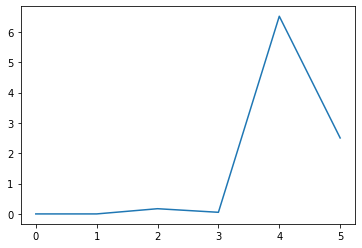

1


<Figure size 432x288 with 0 Axes>

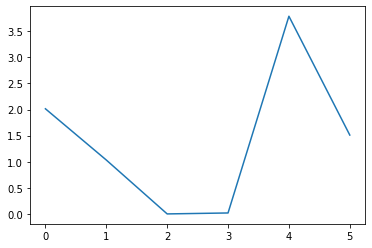

2


<Figure size 432x288 with 0 Axes>

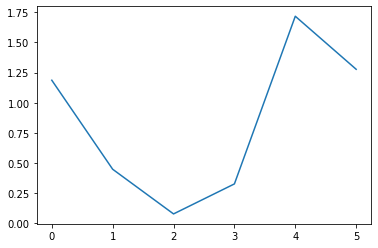

3


<Figure size 432x288 with 0 Axes>

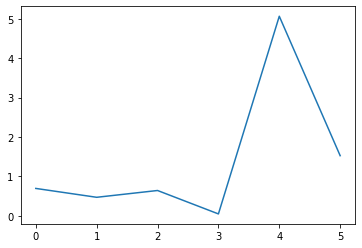

4


<Figure size 432x288 with 0 Axes>

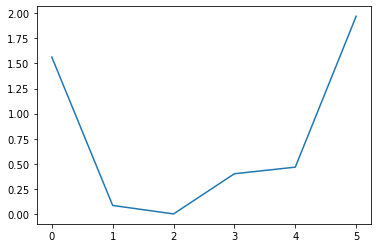

5


<Figure size 432x288 with 0 Axes>

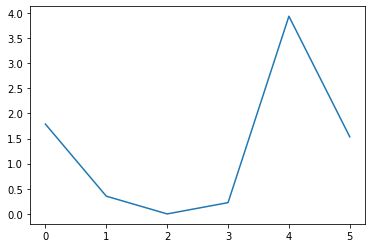

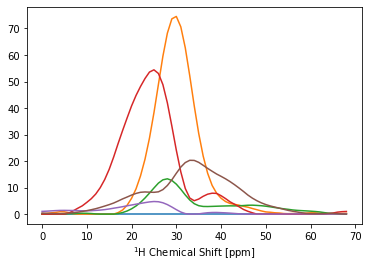

rank 7
Error increased above fractional tol_increase (ST iter). Exiting


INFO:pymcr.mcr:Error increased above fractional tol_increase (ST iter). Exiting


0


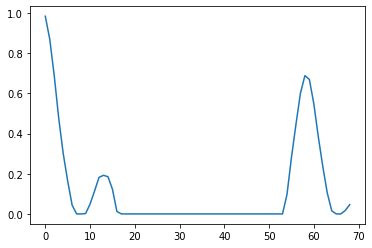

1


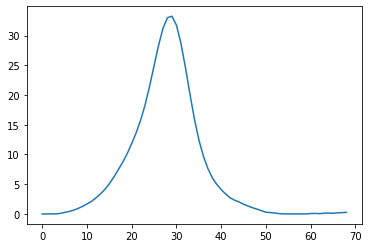

2


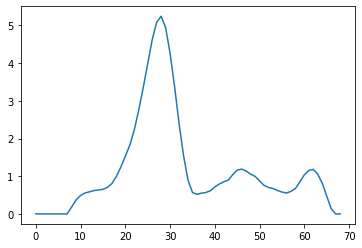

3


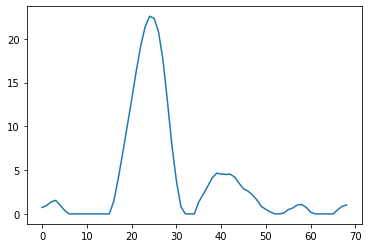

4


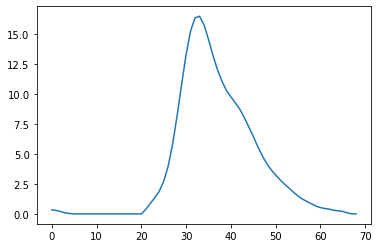

5


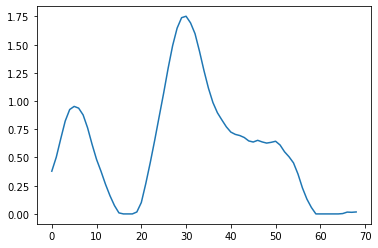

6


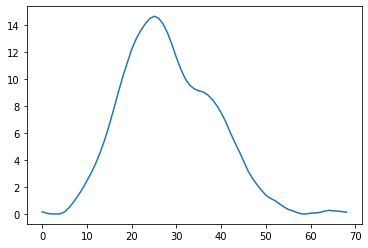

0


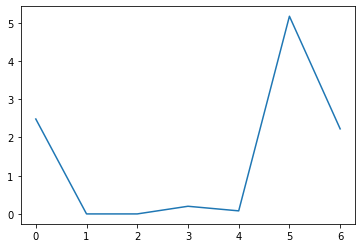

1


<Figure size 432x288 with 0 Axes>

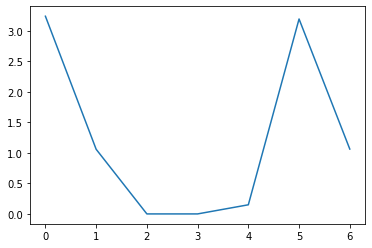

2


<Figure size 432x288 with 0 Axes>

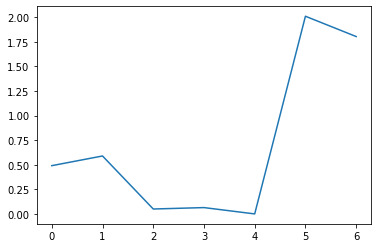

3


<Figure size 432x288 with 0 Axes>

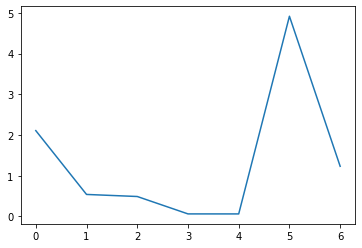

4


<Figure size 432x288 with 0 Axes>

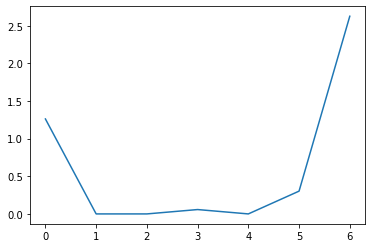

5


<Figure size 432x288 with 0 Axes>

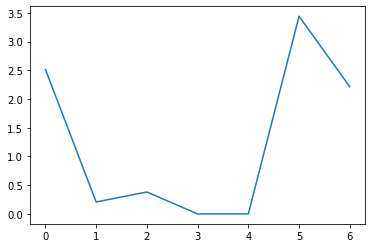

6


<Figure size 432x288 with 0 Axes>

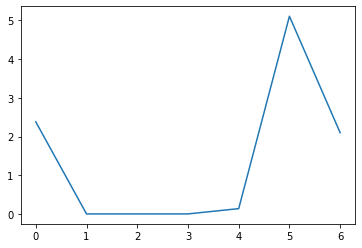

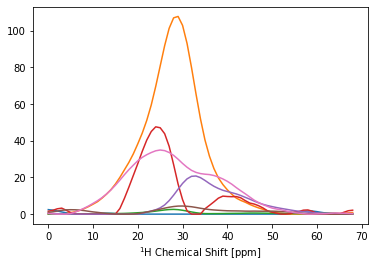

rank 8
Error increased above fractional tol_increase (ST iter). Exiting


INFO:pymcr.mcr:Error increased above fractional tol_increase (ST iter). Exiting


0


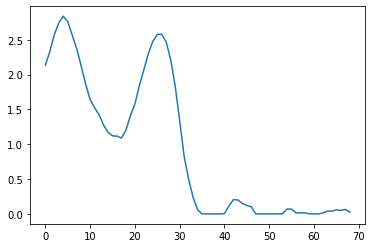

1


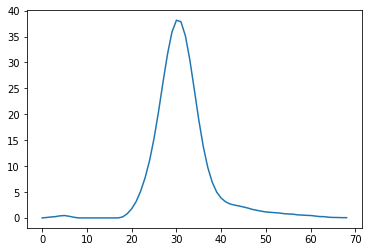

2


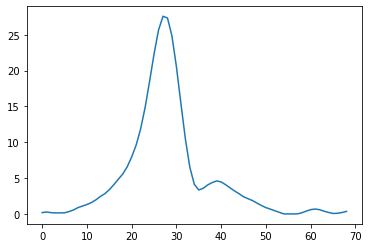

3


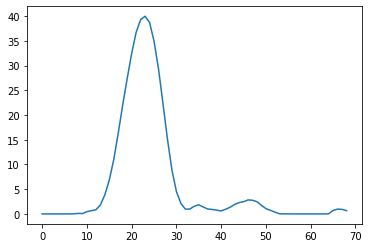

4


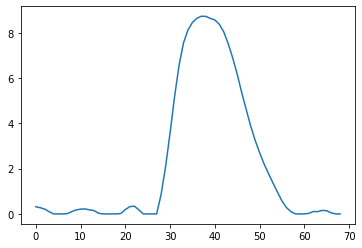

5


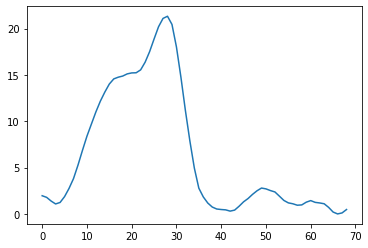

6


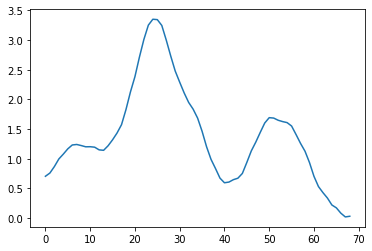

7


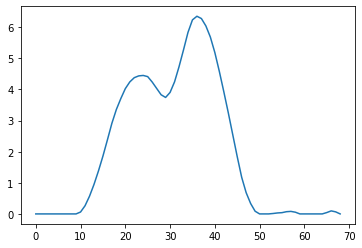

0


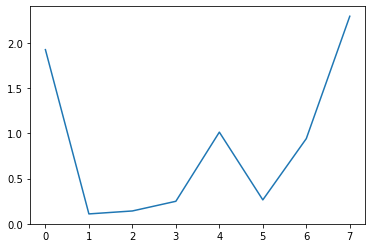

1


<Figure size 432x288 with 0 Axes>

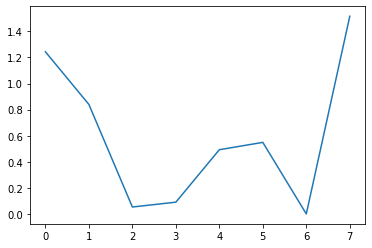

2


<Figure size 432x288 with 0 Axes>

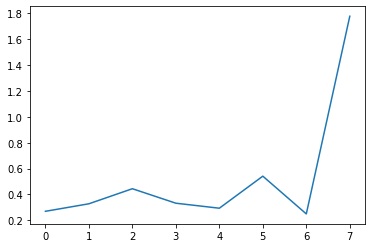

3


<Figure size 432x288 with 0 Axes>

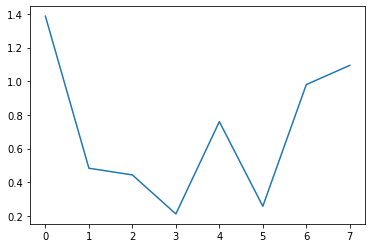

4


<Figure size 432x288 with 0 Axes>

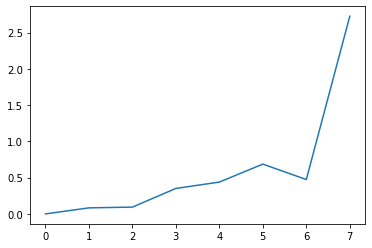

5


<Figure size 432x288 with 0 Axes>

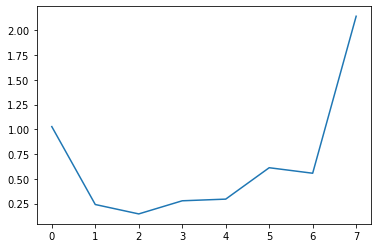

6


<Figure size 432x288 with 0 Axes>

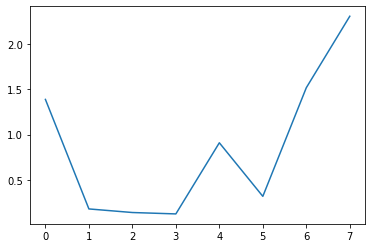

7


<Figure size 432x288 with 0 Axes>

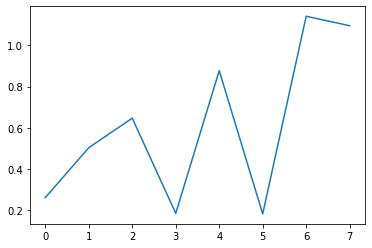

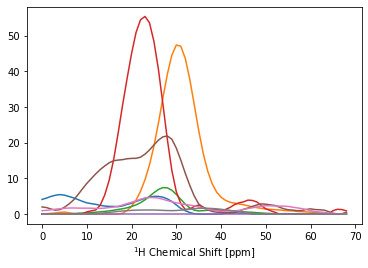

rank 9
Error increased above fractional tol_increase (ST iter). Exiting


INFO:pymcr.mcr:Error increased above fractional tol_increase (ST iter). Exiting


0


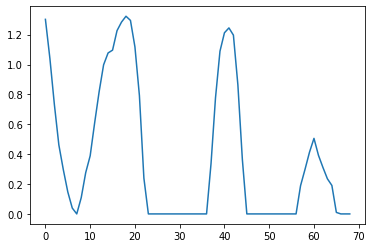

1


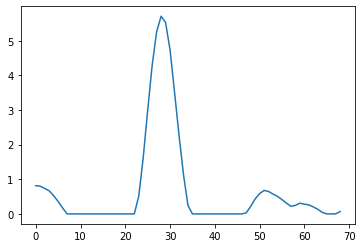

2


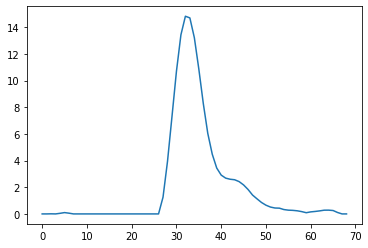

3


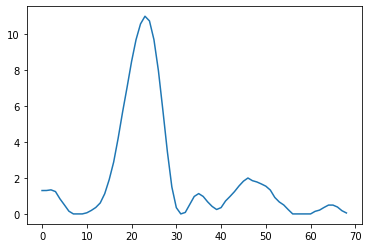

4


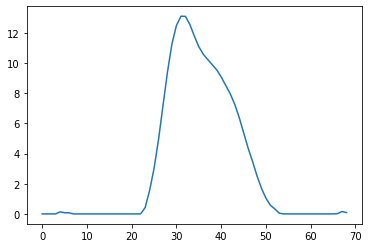

5


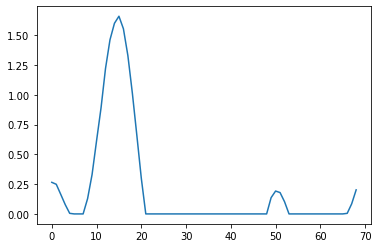

6


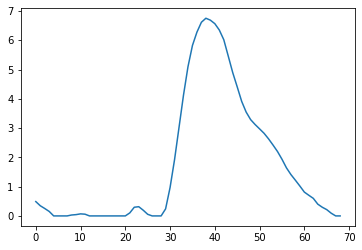

7


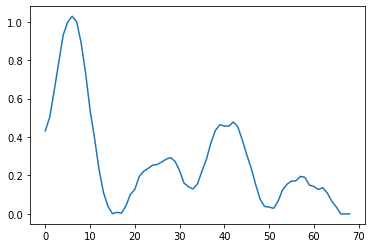

8


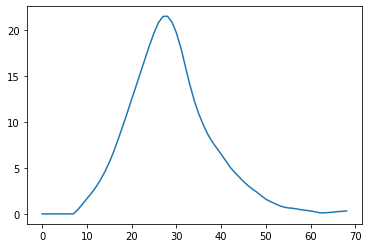

0


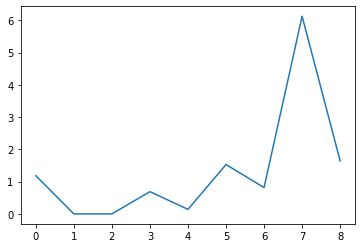

1


<Figure size 432x288 with 0 Axes>

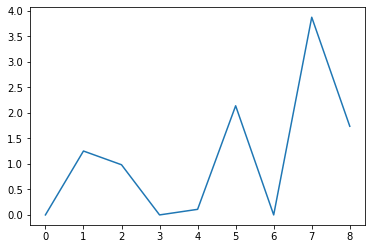

2


<Figure size 432x288 with 0 Axes>

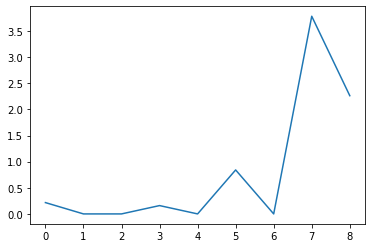

3


<Figure size 432x288 with 0 Axes>

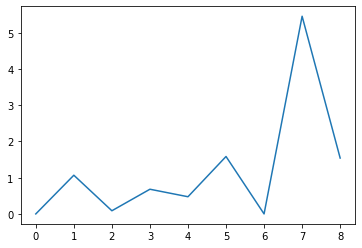

4


<Figure size 432x288 with 0 Axes>

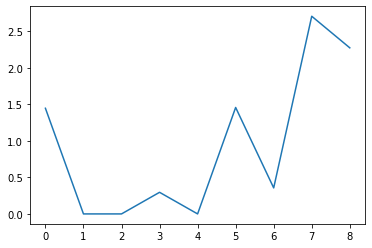

5


<Figure size 432x288 with 0 Axes>

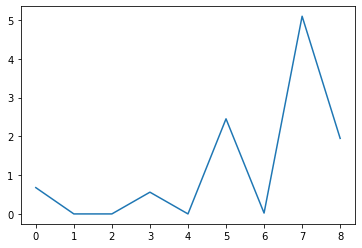

6


<Figure size 432x288 with 0 Axes>

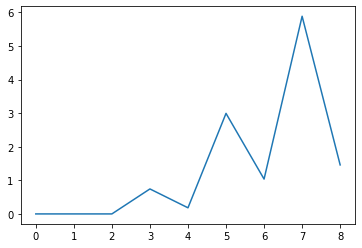

7


<Figure size 432x288 with 0 Axes>

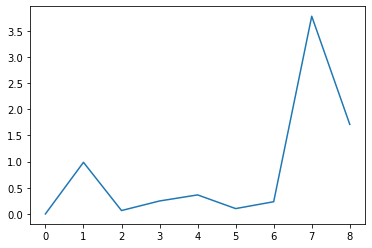

8


<Figure size 432x288 with 0 Axes>

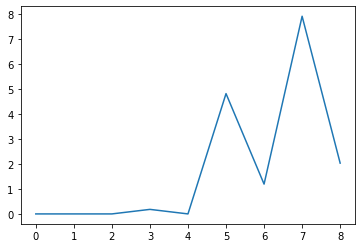

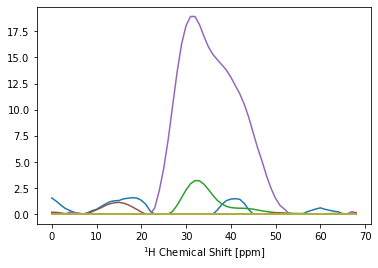

In [78]:
minrank = 3
maxrank = 10
for i in range(minrank,maxrank):
    print("rank", i)
    mcrar.fit(df.values.T, ST=df.values.T[0:i]*1)
    W = mcrar.C_
    H = mcrar.ST_
    for k in range(i):
     print(k)
     fig = plt.figure()
     plt.plot(W[:,k])
     plt.show()
    for l in range(i):
     print(l)
     fig = plt.figure()
     plt.plot(H[:,l])
     plt.show()
     fig = plt.figure()
    for n in range(i):
     A=H
     B=H
     A=np.array(H)
     B=np.array(H)
     plt.plot(np.dot(W[:,n],A[0,n]))
     plt.xlabel('$^{1}$H Chemical Shift [ppm]')
    plt.show()